<a href="https://colab.research.google.com/github/athulyaps2508/colab/blob/master/3dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
import random 
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
random.seed(0)

In [0]:
samples = 1000
linkLength = 2
Q1 = []
Q2 = []
Q3 = []
posX = []
posY = []
titaEnd = []

In [0]:
def customloss (yTrue,yPred):
    return keras.backend.sum((yTrue - yPred)**2)


In [0]:
def Xe (a,b,c):                 # return the X,Y,Tita for a given 2 joint angles
    return linkLength*math.cos(a)+linkLength*math.cos(a+b)+linkLength*math.cos(a+b+c)
def Ye (e,f,g):
    return linkLength*math.sin(e) + linkLength*math.sin(e + f) + linkLength*math.sin(e + f + g)
def tita (h,i,j):
    return math.degrees(h)+math.degrees(i)+math.degrees(j)

In [0]:
file = open ("training_data.csv","w")                             # Data Set Creation
for i in range (0,samples):
    q1= round(random.uniform(0,math.pi),2)
    q2= round(random.uniform(-math.pi,0),2)
    q3= round(random.uniform(-math.pi/2, math.pi/2), 2)

    Q1.append(q1)
    file.write(str(q1))
    file.write(",")

    Q2.append(q2)
    file.write(str(q2))
    file.write(",")

    Q3.append(q3)
    file.write(str(q3))
    file.write(",")

    X = Xe(q1,q2,q3)
    posX.append(X)
    file.write(str(round(X, 2)))
    file.write(",")

    Y =Ye(q1,q2,q3)
    posY.append(Y)
    file.write(str(round(Y, 2)))
    file.write(",")

    T = tita(q1,q2,q3)
    titaEnd.append(T)
    file.write(str(round(T, 2)))
    file.write("\n")

file.close()


In [0]:
data = pd.read_csv("training_data.csv", names = ["Q1", "Q2", "Q3", "X", "Y", "Theta"])

In [0]:
data.head()

,Q1,Q2,Q3,X,Y,Theta
0,2.65,-0.76,-0.25,-2.53,4.84,93.97
1,0.81,-1.54,-0.30,3.90,-1.60,-59.01
2,2.46,-2.19,-0.07,2.33,2.19,11.46
3,1.83,-0.29,0.01,-0.41,5.93,88.81
4,0.89,-0.77,0.37,5.01,2.73,28.07


In [0]:
data['Q4'] = 0
data['Q5'] = 0
data['Q6'] = 0
data['Q7'] = 0

In [0]:
data.head()

,Q1,Q2,Q3,X,Y,Theta,Q4,Q5,Q6,Q7
0,2.65,-0.76,-0.25,-2.53,4.84,93.97,0,0,0,0
1,0.81,-1.54,-0.30,3.90,-1.60,-59.01,0,0,0,0
2,2.46,-2.19,-0.07,2.33,2.19,11.46,0,0,0,0
3,1.83,-0.29,0.01,-0.41,5.93,88.81,0,0,0,0
4,0.89,-0.77,0.37,5.01,2.73,28.07,0,0,0,0


In [0]:
data.describe()

,Q1,Q2,Q3,X,Y,Theta,Q4,Q5,Q6,Q7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0
mean,1.593670,-1.564880,0.000560,1.270220,1.407230,1.681550,0.0,0.0,0.0,0.0
std,0.899027,0.936583,0.904491,2.555238,2.656946,89.667908,0.0,0.0,0.0,0.0
min,0.000000,-3.140000,-1.570000,-5.790000,-3.860000,-246.370000,0.0,0.0,0.0,0.0
25%,0.810000,-2.430000,-0.742500,-0.310000,-1.115000,-61.880000,0.0,0.0,0.0,0.0
50%,1.610000,-1.560000,-0.010000,1.565000,1.540000,4.295000,0.0,0.0,0.0,0.0
75%,2.380000,-0.750000,0.742500,3.092500,3.810000,64.740000,0.0,0.0,0.0,0.0
max,3.140000,-0.000000,1.570000,5.870000,5.940000,233.770000,0.0,0.0,0.0,0.0


<function matplotlib.pyplot.show>

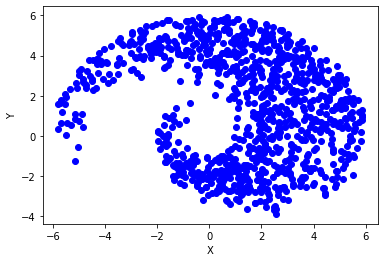

In [0]:
plt.scatter(posX, posY, color = 'b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show

In [0]:
def build_model():              # NN Model
  model = Sequential()
  model.add(Dense(10,input_shape=(3,),activation='tanh'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(7))
  model.compile(Adam(lr= 0.001), loss='mse',metrics=['accuracy'])
  return model

In [0]:
X_data = data.iloc[:, [3,4,5]]
y_data = data.iloc[:,[0,1,2,6,7,8,9]]

In [0]:
print(X_data)
print(y_data)

        X     Y   Theta
0   -2.53  4.84   93.97
1    3.90 -1.60  -59.01
2    2.33  2.19   11.46
3   -0.41  5.93   88.81
4    5.01  2.73   28.07
..    ...   ...     ...
995 -0.21  5.04  135.22
996  4.09 -0.61  -41.83
997 -0.59  5.35   76.20
998  1.98 -1.83 -126.62
999  0.38 -1.27 -138.08

[1000 rows x 3 columns]
       Q1    Q2    Q3  Q4  Q5  Q6  Q7
0    2.65 -0.76 -0.25   0   0   0   0
1    0.81 -1.54 -0.30   0   0   0   0
2    2.46 -2.19 -0.07   0   0   0   0
3    1.83 -0.29  0.01   0   0   0   0
4    0.89 -0.77  0.37   0   0   0   0
..    ...   ...   ...  ..  ..  ..  ..
995  1.55 -0.60  1.41   0   0   0   0
996  1.10 -1.66 -0.17   0   0   0   0
997  2.34 -0.93 -0.08   0   0   0   0
998  0.58 -1.30 -1.49   0   0   0   0
999  1.12 -2.17 -1.36   0   0   0   0

[1000 rows x 7 columns]


In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 10)

In [0]:
print(X_data)

        X     Y   Theta
0   -2.53  4.84   93.97
1    3.90 -1.60  -59.01
2    2.33  2.19   11.46
3   -0.41  5.93   88.81
4    5.01  2.73   28.07
..    ...   ...     ...
995 -0.21  5.04  135.22
996  4.09 -0.61  -41.83
997 -0.59  5.35   76.20
998  1.98 -1.83 -126.62
999  0.38 -1.27 -138.08

[1000 rows x 3 columns]


In [0]:
#print(np.shape(X_train))
#print(np.shape(y_train))

In [0]:
x_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x_scaler_test = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_scaler_test = preprocessing.MinMaxScaler(feature_range=(-1,1))
x_scaler_eva = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_scaler_eva = preprocessing.MinMaxScaler(feature_range=(-1,1))

X_train = x_scaler.fit_transform(X_data)
y_train = y_scaler.fit_transform(y_data)
#X_test = x_scaler_test.fit_transform(X_test)
#y_test = y_scaler_test.fit_transform(y_test)

In [0]:
print(np.shape(X_train))
print(X_train)
print(y_train)

(1000, 3)
[[-0.44082333  0.7755102   0.41766985]
 [ 0.66209262 -0.53877551 -0.21956096]
 [ 0.39279588  0.23469388  0.07397842]
 ...
 [-0.10806175  0.87959184  0.34364977]
 [ 0.33276158 -0.58571429 -0.50118715]
 [ 0.05831904 -0.47142857 -0.54892323]]
[[ 0.68789809  0.51592357 -0.15923567 ... -1.         -1.
  -1.        ]
 [-0.48407643  0.01910828 -0.1910828  ... -1.         -1.
  -1.        ]
 [ 0.56687898 -0.39490446 -0.04458599 ... -1.         -1.
  -1.        ]
 ...
 [ 0.49044586  0.40764331 -0.05095541 ... -1.         -1.
  -1.        ]
 [-0.63057325  0.17197452 -0.94904459 ... -1.         -1.
  -1.        ]
 [-0.2866242  -0.38216561 -0.86624204 ... -1.         -1.
  -1.        ]]


In [0]:
model = build_model()
history = model.fit(X_train,y_train, nb_epoch=2000, validation_split = 0.2) #train the model
#[loss,mae] =model.evaluate(X_test,y_test,verbose=0)        #evaluation
#print("Testing set Mean Abs Error: ${:7.2f}".format(mae))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 800 samples, validate on 200 samples
Epoch 1/2000





800/800 [==============================] - 1s 1ms/step - loss: 0.5600 - acc: 0.3850 - val_loss: 0.4287 - val_acc: 0.3900
Epoch 2/2000
800/800 [==============================] - 0s 48us/step - loss: 0.3214 - acc: 0.4425 - val_loss: 0.2212 - val_acc: 0.4050
Epoch 3/2000
800/800 [==============================] - 0s 54us/step - loss: 0.1647 - acc: 0.4475 - val_loss: 0.1268 - val_acc: 0.4100
Epoch 4/2000
800/800 [==============================] - 0s 49us/step - loss: 0.1132 - acc: 0.4650 - val_loss: 0.1044 - val_acc: 0.4100
Epoch 5/2000
800/800 [==============================] - 0s 50us/step - loss: 0.0986 - acc: 0.4838 - val_loss: 0.0954 - val_acc: 0.4250
Epoch 6/2000
800/800 [==============================] - 0s 51us/step - loss: 0.0917 - acc: 0.4900 - val_loss: 0.0893 - val_acc: 0.4400
Epoch 7/2000
800/800 [==============================] - 0s 55us/step - loss: 0.0865 - acc: 0.5100 - val_loss: 0.0843 - val_acc: 0.4750
Epo

Text(0.5, 0, 'epoch')

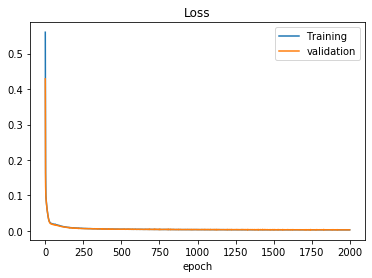

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')